# Assignment 2





Assignment 2

Niko Fauter (1047241)

Henning Klatt (1079429)

## 1 Fourier Transform for Image Quality Assessment

### 2D Fourier Transform

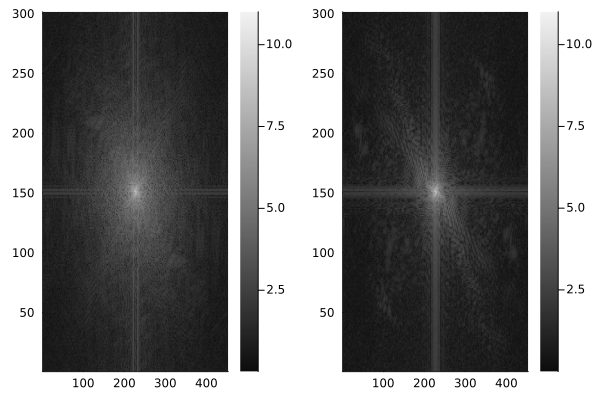

In [4]:
include("utils.jl")
using .Utils
using FFTW
using Plots
using Images
using TestImages
using Interact

flower1 = load("flower01.png");
flower2 = load("flower02.png");
flower1=  channelview(float.(flower1));
flower2=  channelview(float.(flower2));

flower1_fft=fftshift(fft(flower1))
flower2_fft=fftshift(fft(flower2))
p1=heatmap(log.(1 .+ abs.(flower1_fft)) ,color=:grays)
p2=heatmap(log.(1 .+ abs.(flower2_fft)) ,color=:grays)

plot(p1,p2)


### High Pass Gaussian Filter

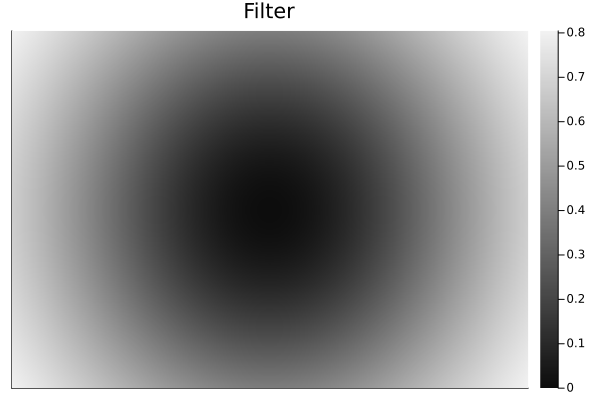

In [6]:
function gauss_filter(img)
    G=zeros(size(img))
    sigma=size(img,1)/2
    channelview(float.(flower1));
    for i in eachindex(view(img,1:size(img,1),1:size(img,2)))
        diff_x=i[2]-size(img,2)/2
        diff_y=i[1]-size(img,1)/2
        x_squared= diff_x^2 + diff_y^2
        exponent= -x_squared/(2*sigma^2)
        G[i]= exp(exponent)
    end
    m=maximum(G)  
    G=G./m
    return G
end
G=gauss_filter(flower1)
flower1_spectrum_filtered = flower1_fft.*(1 .-G)
flower1_filtered =ifft(flower1_spectrum_filtered)
#print(maximum(imag.(flower1_filtered)))
filter=heatmap((1 .-G),color=:grays, xticks=false, yticks=false, title="Filter")


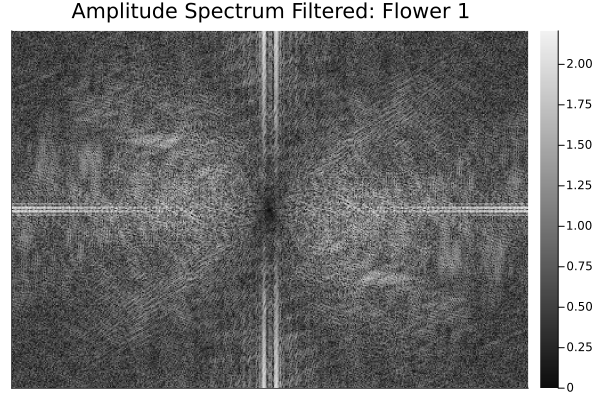

In [7]:
p1=plot(heatmap(log.(1 .+ abs.(flower1_spectrum_filtered)), color=:grays, xticks=false, yticks=false, title="Amplitude Spectrum Filtered: Flower 1"))

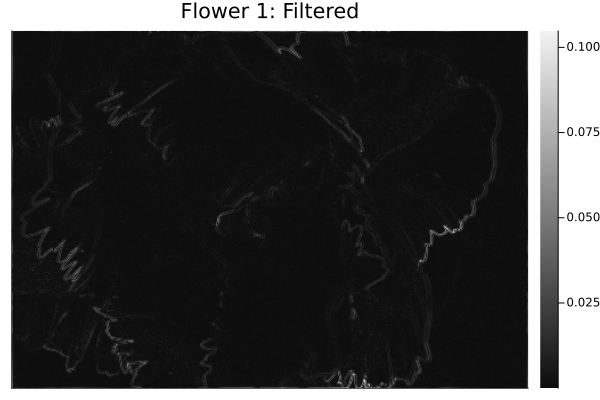

In [11]:
filtered_img=heatmap(abs.(flower1_filtered),color=:grays, xticks=false, yticks=false, title="Flower 1: Filtered")

In [9]:
G=gauss_filter(flower2)

flower2_spectrum_filtered = flower2_fft.*(1 .-G)
flower2_filtered =ifft(flower2_spectrum_filtered)
print(maximum(imag.(flower2_filtered)))


0.03454068292826298

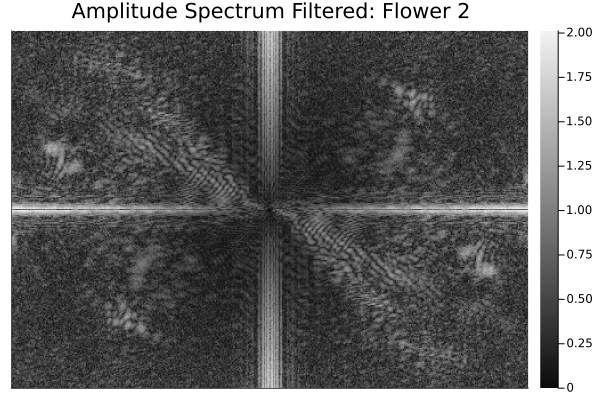

In [10]:
p2=plot(heatmap(log.(1 .+ abs.(flower2_spectrum_filtered)), color=:grays, xticks=false, yticks=false, title="Amplitude Spectrum Filtered: Flower 2"))

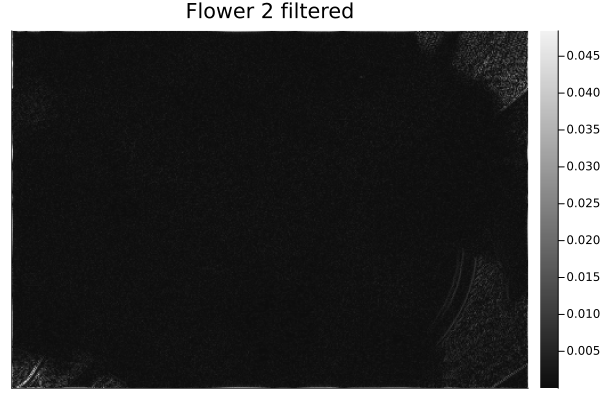

In [12]:
plot(heatmap(abs.(flower2_filtered), color=:grays, xticks=false, yticks=false, title="Flower 2 filtered"))

### Energy Function

In [14]:
function energy(img_spectrum)
    return sum(abs.(img_spectrum).^2)/length(img_spectrum)
end

energy (generic function with 1 method)

### Plots with Energy 

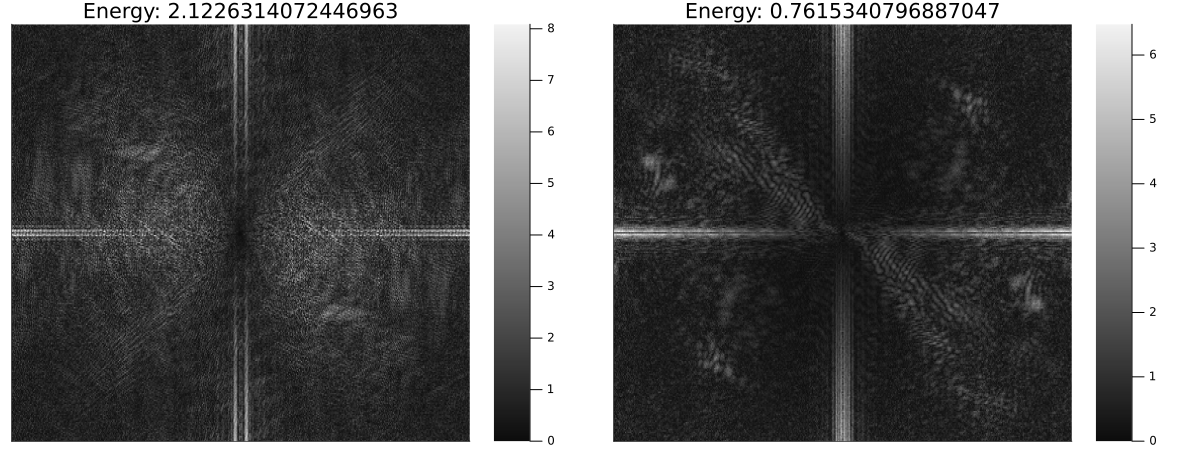

In [17]:
img = channelview(float.(flower1));
p1=plot(heatmap(abs.(flower1_spectrum_filtered), color=:grays, xticks=false, yticks=false,title=string("Energy: ", energy(flower1_spectrum_filtered))))
p2=plot(heatmap(abs.(flower2_spectrum_filtered), color=:grays, xticks=false, yticks=false, title=string("Energy: ", energy(flower2_spectrum_filtered))))
plot(p1,p2,size = (size(img,1)*4, size(img,2)))

### Warum weicht unsere Energy leicht von der Musterlösung ab?